<a href="https://colab.research.google.com/github/guptaasakshi/Eco_Vision_Predictorr/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To Read The CSV
import pandas as pd

df = pd.read_csv('rondonia_ndvi_data_final_clean_v2.csv')
data = df[['year','mean_ndvi']]
print(data.head())

     year  mean_ndvi
0  2015.0   0.351926
1  2016.0   0.351958
2  2017.0   0.351642
3  2018.0   0.349808
4  2019.0   0.346290


Loaded Data:
   year  mean_ndvi
0  2015   0.351926
1  2016   0.351958
2  2017   0.351642
3  2018   0.349808
4  2019   0.346290
5  2020   0.342101
6  2021   0.339601
7  2022   0.344232
8  2023   0.342866
9  2024   0.331389


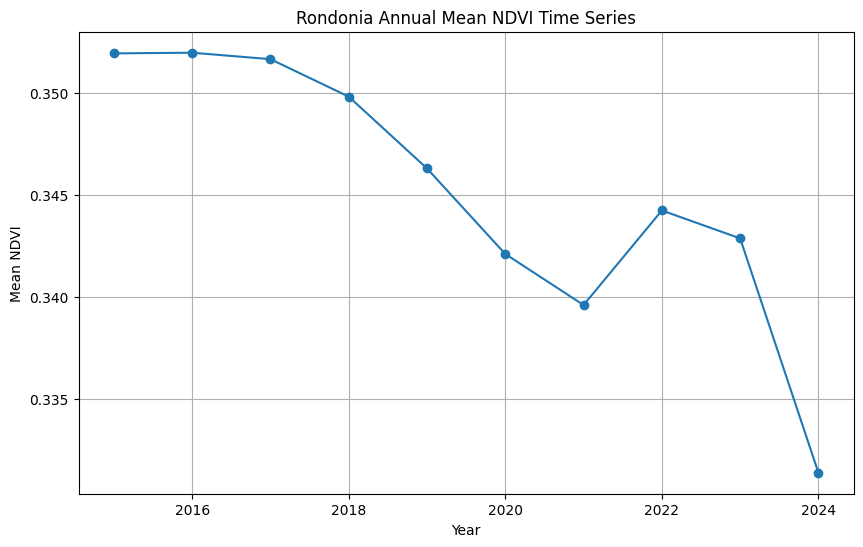

In [ ]:
# Loaded Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'rondonia_ndvi_data_final_clean_v2.csv'

df = pd.read_csv(file_path)

if 'mean_ndvi' not in df.columns:
    print("Error: 'mean_ndvi' column not found in the CSV file.")
else:
    data = df[['year', 'mean_ndvi']].copy()
    data['year'] = data['year'].astype(int)

    print("Loaded Data:")
    print(data)

    plt.figure(figsize=(10, 6))
    plt.plot(data['year'], data['mean_ndvi'], marker='o')
    plt.title('Rondonia Annual Mean NDVI Time Series')
    plt.xlabel('Year')
    plt.ylabel('Mean NDVI')
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data ko load aur prepare karein
file_path = 'rondonia_ndvi_data_final_clean_v2.csv'
df = pd.read_csv(file_path)
data = df['mean_ndvi'].values.reshape(-1, 1)

#scale the value btw 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 2: Build Training and Test data
def create_dataset(dataset, look_back=5):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Step 3: Build LSTM Model and Train Model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print("Model training started...")
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)
print("Model training completed.")

# Step 4: Future prediction with last 5 years data
last_5_years = scaled_data[len(scaled_data) - look_back:]
future_input = np.reshape(last_5_years, (1, 1, look_back))

# Predict the NDVI value for next year (2025)
predicted_scaled_ndvi = model.predict(future_input)
predicted_ndvi = scaler.inverse_transform(predicted_scaled_ndvi)

print(f"\n Predicted Mean NDVI for 2025: {predicted_ndvi[0][0]:.4f}")

Model training started...
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 2s - 507ms/step - loss: 0.2151
Epoch 2/100
4/4 - 0s - 18ms/step - loss: 0.1722
Epoch 3/100
4/4 - 0s - 18ms/step - loss: 0.1328
Epoch 4/100
4/4 - 0s - 32ms/step - loss: 0.1003
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 0.0720
Epoch 6/100
4/4 - 0s - 11ms/step - loss: 0.0518
Epoch 7/100
4/4 - 0s - 11ms/step - loss: 0.0363
Epoch 8/100
4/4 - 0s - 11ms/step - loss: 0.0256
Epoch 9/100
4/4 - 0s - 11ms/step - loss: 0.0187
Epoch 10/100
4/4 - 0s - 11ms/step - loss: 0.0159
Epoch 11/100
4/4 - 0s - 12ms/step - loss: 0.0134
Epoch 12/100
4/4 - 0s - 10ms/step - loss: 0.0125
Epoch 13/100
4/4 - 0s - 10ms/step - loss: 0.0132
Epoch 14/100
4/4 - 0s - 10ms/step - loss: 0.0135
Epoch 15/100
4/4 - 0s - 11ms/step - loss: 0.0133
Epoch 16/100
4/4 - 0s - 11ms/step - loss: 0.0133
Epoch 17/100
4/4 - 0s - 11ms/step - loss: 0.0128
Epoch 18/100
4/4 - 0s - 10ms/step - loss: 0.0126
Epoch 19/100
4/4 - 0s - 10ms/step - loss: 0.0127
Epoch 20/100
4/4 - 0s - 11ms/step - loss: 0.0123
Epoch 21/100
4/4 - 0s - 11ms/step - loss